In [1]:
import tmp_photo as tp

In [3]:
!pwd

/home/akitaya/d5


In [4]:
cd honir_impol/

/mnt/data5/users/akitaya/honir_impol


In [5]:
!ls

2023-01-22  20230116  20230204	20230402  20230821  20231002
2023-02-17  20230130  20230224	20230421  20230822  flat
2023-05-12  20230201  20230228	20230806  20230826  honir_impol_reduction.ipynb


In [29]:
import os
import sys
import glob

import numpy as np

from astropy.io import fits

In [12]:
fns_flat_tmp = sorted(glob.glob('20230116/*_fl.fits'))

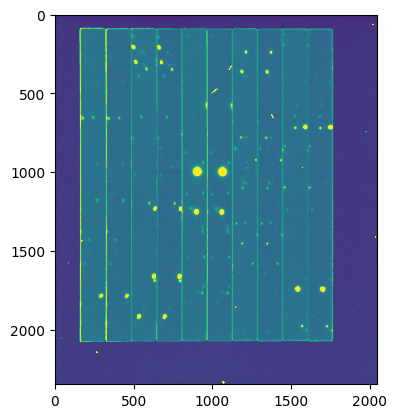

In [14]:
tp.easy_imshow(fns_flat_tmp[0])

## test for find peaks.

https://photutils.readthedocs.io/en/stable/detection.html#local-peak-detection

In [70]:
from astropy.stats import sigma_clipped_stats
from photutils.detection import find_peaks

In [19]:
with fits.open(fns_flat_tmp[0]) as hdul:
    data = hdul[0].data

In [20]:
mean, median, std = sigma_clipped_stats(data, sigma=3.0)

In [21]:
threshold = median + (5.0 * std)

In [22]:
tbl = find_peaks(data, threshold, box_size=11)

In [27]:
tbl['peak_value'].info.format = '%.8g' 

In [28]:
tbl.show_in_notebook()

In [74]:
tbl[0]['x_peak']

902

In [32]:
mask = np.zeros(data.shape, dtype=bool)

In [33]:
mask2 = np.ones(data.shape, dtype=bool)

In [34]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [35]:
mask2

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [36]:
center = (902, 1004)

In [45]:
def unmask_part(coord, mask, boxsize):
    hw = int(boxsize/2)
    x0 = coord[0]
    y0 = coord[1]
    mask[y0-hw:y0+hw-1, x0-hw:x0+hw-1] = False
    return mask

In [46]:
tmparray = [[1, 3], [101, 203]]

In [47]:
mask_o = unmask_part(center, mask2, 20)

In [48]:
np.transpose(tmparray)

array([[  1, 101],
       [  3, 203]])

In [56]:
tbl = find_peaks(data, threshold, box_size=11, mask=mask2)

In [57]:
tbl

<QTable length=1>
x_peak y_peak peak_value
int64  int64   float32  
------ ------ ----------
   902    996  14057.179

In [58]:
import matplotlib.pyplot as plt

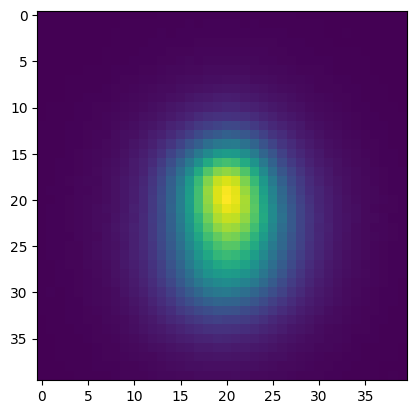

In [60]:
plt.imshow(data[996-20:996+20, 902-20:902+20])

In [66]:
def show_stellarimage(data, coord, width):
    hw = int(width/2)
    x0 = coord[0]
    y0 = coord[1]
    plt.imshow(data[y0-hw:y0+hw, x0-hw:x0+hw])

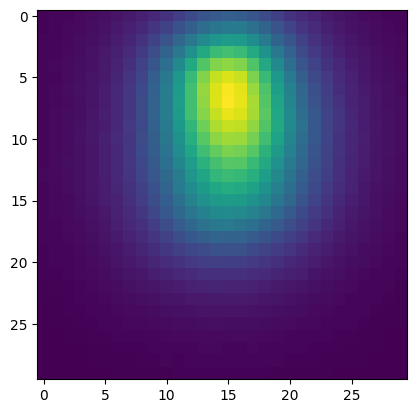

In [67]:
show_stellarimage(data, center, 30)

In [68]:
def show_stellarimage2(data, coord, width):
    hw = int(width/2)
    x0 = coord[0]
    y0 = coord[1]
    plt.xlim([x0-hw, x0+hw])
    plt.ylim([y0-hw, y0+hw])
    plt.imshow(data)

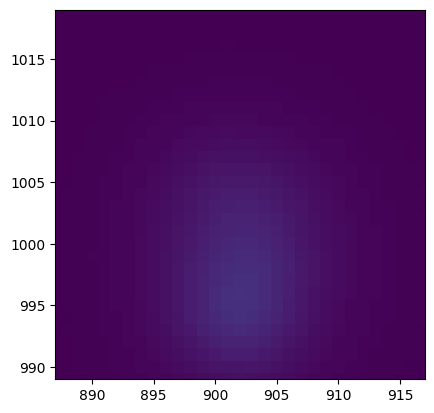

In [69]:
show_stellarimage2(data, center, 30)